Preamble: Dependencies
==============

In [2]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

NumPy and Matplotlib are Python Libraries that are widely used in scientific computing and data visualisation.

In [3]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

The `audio` package is a collection of Python modules developped for this course:

  - use `audio.wave` to read/write WAVE files,
    
  - use `audio.bitstream` to read/write binary data.

In [4]:
import audio.wave
from audio.bitstream import BitStream

In [5]:
from IPython.display import Audio, display

Synthesis of Pure Tones
============

In [6]:
df = 44100.0
dt = 1.0 / df
f = 440.0
T = 3.0

In [7]:
t = r_[0.0:T:dt] # see also: arange, linspace, etc.
t[-1] # the last value (T) is excluded

2.9999773242630385

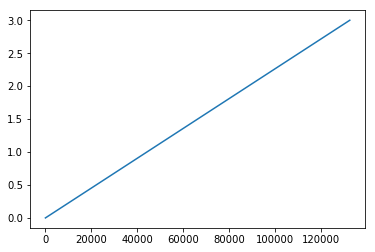

In [8]:
plot(t)

In [9]:
A4 = sin(2*pi*f*t)

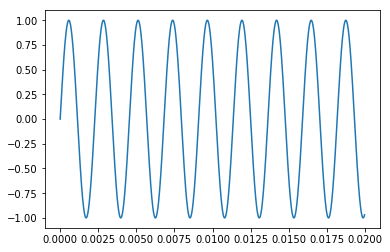

In [10]:
ts = t[t<20.0/1000.0] # 20 ms 
A4s = A4[t<20.0/1000.0]
plot(ts, A4s)

In [11]:
def make_tone(symbol):
    number = int(symbol[1:])
    f = 27.5 * 2 ** number
    x = cos(2*pi*f*t)
    audio.wave.write(x, symbol + ".wav")
    return x

In [12]:
A4 = make_tone("A4")

In [13]:
Audio("A4.wav")

In [14]:
A = []
for i in range(0,11):
    symbol = "A" + str(i)
    A.append(make_tone(symbol))

In [15]:
for i, sound in enumerate(A):
    name = "A" + str(i)
    display(Audio(name + ".wav"))

In [16]:
27.5 * 2**10


28160.0

In [17]:
Audio("A10.wav")

In [18]:
for sound in A:
    print mean(sound*sound)

0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5


In [19]:
def L(x):
    return 96.0 + 10.0 * log10(mean(x*x))

In [20]:
L(A[4])

92.989700043360187

WAVE Format Header Analysis
================

In [21]:
# audio.io.play(A[4], df=16000). 

Wave format documentation: <http://soundfile.sapp.org/doc/WaveFormat/>

In [22]:
raw = open("A4.wav").read() # raw is a 'str' (string)
print raw[:4], raw[8:12]


RIFF WAVE


In [23]:
raw = open("A4.wav").read()
stream = BitStream(raw)
print stream.read(str, 4)
_ = stream.read(str, 4)
print stream.read(str, 4)

RIFF
WAVE


In [24]:
raw = open("A4.wav").read()
stream = BitStream(raw)
_ = stream.read(str, 22)
print stream.read(uint16).newbyteorder() # 2-byte integer (little end.)
print stream.read(uint32).newbyteorder() # 4-byte integer (little end.)

1
44100


Quantization and Signal-to-Noise Ratio
=====================

In [25]:
A4q = audio.wave.read("A4.wav")
e = A4 - A4q
SNR = sqrt(mean(A4*A4) / mean(e * e))
print SNR

77863.1828913


In [26]:
print 20.0 * log10(SNR) # SNR in dB

97.8266430567
